In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# theme settings
import seaborn as sns
import matplotlib.pyplot as plt

# Set global Seaborn style
sns.set_theme(
    style='whitegrid',     # Options: white, dark, ticks
    palette='Set2',        # Other options: 'tab10', 'pastel', 'coolwarm', etc.
    font='DejaVu Sans',    # Or 'Arial', 'Calibri'
    context='notebook'     # Options: paper, talk, poster
)

# Optional: adjust matplotlib defaults
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.figsize': (8, 5),
    'figure.dpi': 100,
    'axes.edgecolor': '#333333',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': '#E5E5E5'
})

In [3]:
xls = pd.ExcelFile("df.xlsx")
df = pd.read_excel(xls, "Banking Data")
df_dic = pd.read_excel(xls, "Data Dictionary")

In [4]:
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionType,Amount,ProductCategory,ProductSubcategory,BranchCity,BranchLat,BranchLong,Channel,Currency,CreditCardFees,InsuranceFees,LatePaymentAmount,CustomerScore,MonthlyIncome,CustomerSegment,RecommendedOffer
0,1,8270,2025-01-29,Card Payment,6980.185223,Checking Account,Gold,Seville,37.3891,-5.9845,Branch,EUR,0.0,0.00,0.0,839,5767.68,Middle Income Segment,Mid-tier Savings Booster
1,2,1860,2023-02-10,Deposit,10786.371854,Mortgage,Gold,Murcia,37.9847,-1.1287,Branch,EUR,0.0,0.00,0.0,683,2441.00,Low Income Segment,Financial Literacy Program Access
2,3,6390,2024-03-07,Transfer,3982.761111,Loan,Platinum,Malaga,36.7213,-4.4214,ATM,EUR,0.0,92.46,0.0,500,9957.08,High Income Segment,Premium Investment Services
3,4,6191,2023-07-04,Withdrawal,12408.644136,Mortgage,Standard,Seville,37.3891,-5.9845,ATM,EUR,0.0,0.00,0.0,392,1545.80,Low Income Segment,Financial Literacy Program Access
4,5,6734,2025-02-05,Fee,1868.260998,Checking Account,Platinum,Murcia,37.9847,-1.1287,Mobile,USD,0.0,0.00,0.0,368,5825.27,Middle Income Segment,Mid-tier Savings Booster


In [5]:
df_dic

,Column Name,Description
0,TransactionID,Unique identifier for each transaction
1,CustomerID,Unique identifier for each customer
2,TransactionDate,Date when the transaction occurred
3,TransactionType,"Type of transaction (e.g., Deposit, Withdrawal..."
4,Amount,Monetary value of the transaction
5,ProductCategory,Category of the financial product involved in ...
6,ProductSubcategory,Subcategory within the product category
7,BranchCity,City where the transaction occurred or branch ...
8,BranchLat,Latitude of the branch location
9,BranchLong,Longitude of the branch location


## Exploratory Data Analysis

Checking data properties

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       20000 non-null  int64         
 1   CustomerID          20000 non-null  int64         
 2   TransactionDate     20000 non-null  datetime64[ns]
 3   TransactionType     20000 non-null  object        
 4   Amount              20000 non-null  float64       
 5   ProductCategory     20000 non-null  object        
 6   ProductSubcategory  20000 non-null  object        
 7   BranchCity          20000 non-null  object        
 8   BranchLat           20000 non-null  float64       
 9   BranchLong          20000 non-null  float64       
 10  Channel             20000 non-null  object        
 11  Currency            20000 non-null  object        
 12  CreditCardFees      20000 non-null  float64       
 13  InsuranceFees       20000 non-null  float64   

In [7]:
df['ProductCategory'].value_counts()

Credit Card         4082
Savings Account     4042
Loan                3998
Mortgage            3990
Checking Account    3888
Name: ProductCategory, dtype: int64

In [8]:
df['CustomerID'].value_counts()

3415    11
4083     9
5780     9
9125     8
3064     8
        ..
9888     1
7746     1
3406     1
1342     1
3813     1
Name: CustomerID, Length: 8025, dtype: int64

Checking statistical distribution

In [9]:
df.describe()

,TransactionID,CustomerID,Amount,BranchLat,BranchLong,CreditCardFees,InsuranceFees,LatePaymentAmount,CustomerScore,MonthlyIncome
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,5485.626000,5050.355118,39.769383,-2.150508,5.219896,9.983711,16.654402,575.297450,5484.947090
std,5773.647028,2600.877312,3526.028326,2.150999,2.444790,12.221252,23.716191,44.109067,159.418177,2601.897479
min,1.000000,1000.000000,8.275197,36.721300,-5.984500,0.000000,0.000000,0.000000,300.000000,1000.860000
25%,5000.750000,3218.750000,2209.771959,37.389100,-4.421400,0.000000,0.000000,0.000000,437.000000,3224.785000
50%,10000.500000,5503.000000,4382.682068,39.469900,-1.128700,0.000000,0.000000,0.000000,577.000000,5473.545000
75%,15000.250000,7728.000000,7350.925301,41.387400,-0.889100,0.000000,0.000000,0.000000,715.000000,7736.802500
max,20000.000000,9998.000000,14895.170734,43.263000,2.168600,49.990000,99.950000,199.980000,849.000000,9998.880000


from the description above, it tells that
- over 50% of transaction amount are lower than 5000 with the maximum amount being 14,000
- most customers have a high credit score, with more 75% having above 400 credit score and the max being 800

Meaningfull statistical columns
- Amount
- MonthlyIncome

In [10]:
df.describe(include='object') # includes categorical data

,TransactionType,ProductCategory,ProductSubcategory,BranchCity,Channel,Currency,CustomerSegment,RecommendedOffer
count,20000,20000,20000,20000,20000,20000,20000,20000
unique,6,5,5,8,4,2,3,7
top,Withdrawal,Credit Card,Student,Murcia,Mobile,EUR,Middle Income Segment,Mid-tier Savings Booster
freq,3395,4082,4098,2564,5219,16974,8885,5220


In [11]:
df.nunique()

TransactionID         20000
CustomerID             8025
TransactionDate         871
TransactionType           6
Amount                19967
ProductCategory           5
ProductSubcategory        5
BranchCity                8
BranchLat                 8
BranchLong                8
Channel                   4
Currency                  2
CreditCardFees         2801
InsuranceFees          3278
LatePaymentAmount      3120
CustomerScore           550
MonthlyIncome         19792
CustomerSegment           3
RecommendedOffer          7
dtype: int64

## Checking correlation between numerical values

In [12]:
df.corr(numeric_only="True")

,TransactionID,CustomerID,Amount,BranchLat,BranchLong,CreditCardFees,InsuranceFees,LatePaymentAmount,CustomerScore,MonthlyIncome
TransactionID,1.000000,0.004596,0.005504,-0.010391,0.017088,-0.012207,0.006976,0.013477,0.001281,-0.000669
CustomerID,0.004596,1.000000,0.001830,0.000739,-0.003372,-0.014955,-0.001783,-0.006754,-0.004424,-0.011336
Amount,0.005504,0.001830,1.000000,-0.005954,0.006214,-0.007724,0.150603,-0.006069,-0.010410,0.003100
BranchLat,-0.010391,0.000739,-0.005954,1.000000,0.466011,-0.001149,0.003204,-0.008368,-0.003952,-0.002368
BranchLong,0.017088,-0.003372,0.006214,0.466011,1.000000,0.003878,0.012082,0.003865,-0.000328,0.010538
CreditCardFees,-0.012207,-0.014955,-0.007724,-0.001149,0.003878,1.000000,-0.179810,0.002313,0.001541,0.000165
InsuranceFees,0.006976,-0.001783,0.150603,0.003204,0.012082,-0.179810,1.000000,-0.005473,0.003947,0.004092
LatePaymentAmount,0.013477,-0.006754,-0.006069,-0.008368,0.003865,0.002313,-0.005473,1.000000,0.007530,0.000569
CustomerScore,0.001281,-0.004424,-0.010410,-0.003952,-0.000328,0.001541,0.003947,0.007530,1.000000,0.000259
MonthlyIncome,-0.000669,-0.011336,0.003100,-0.002368,0.010538,0.000165,0.004092,0.000569,0.000259,1.000000


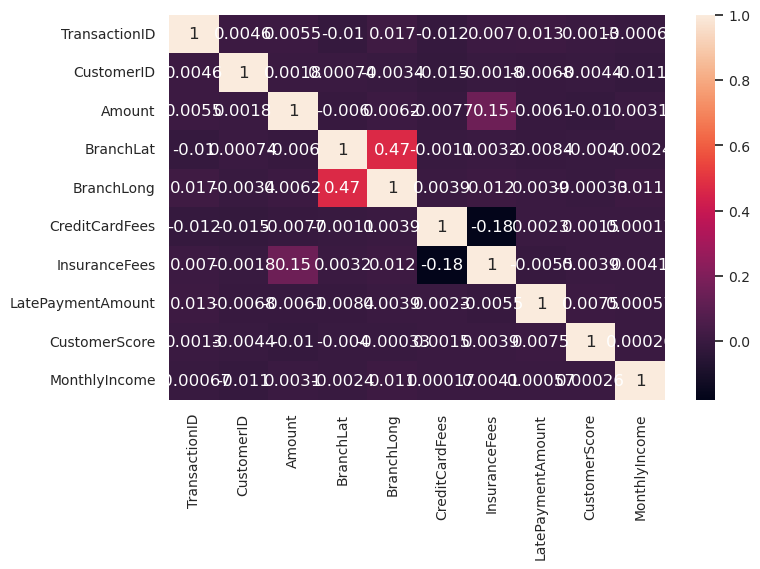

In [13]:
sns.heatmap(df.corr(numeric_only="True"), annot=True)
plt.show()

the diagram above shows no correlation nor meaningful relationship between any numerical features

## Checking Data Distribution

here, I'd check the distribution of important columns which are
- Amount
- ProductCategory
- ProductSubcategory
- CustomerScore
- CustomerSegment
- RecommendedOffer

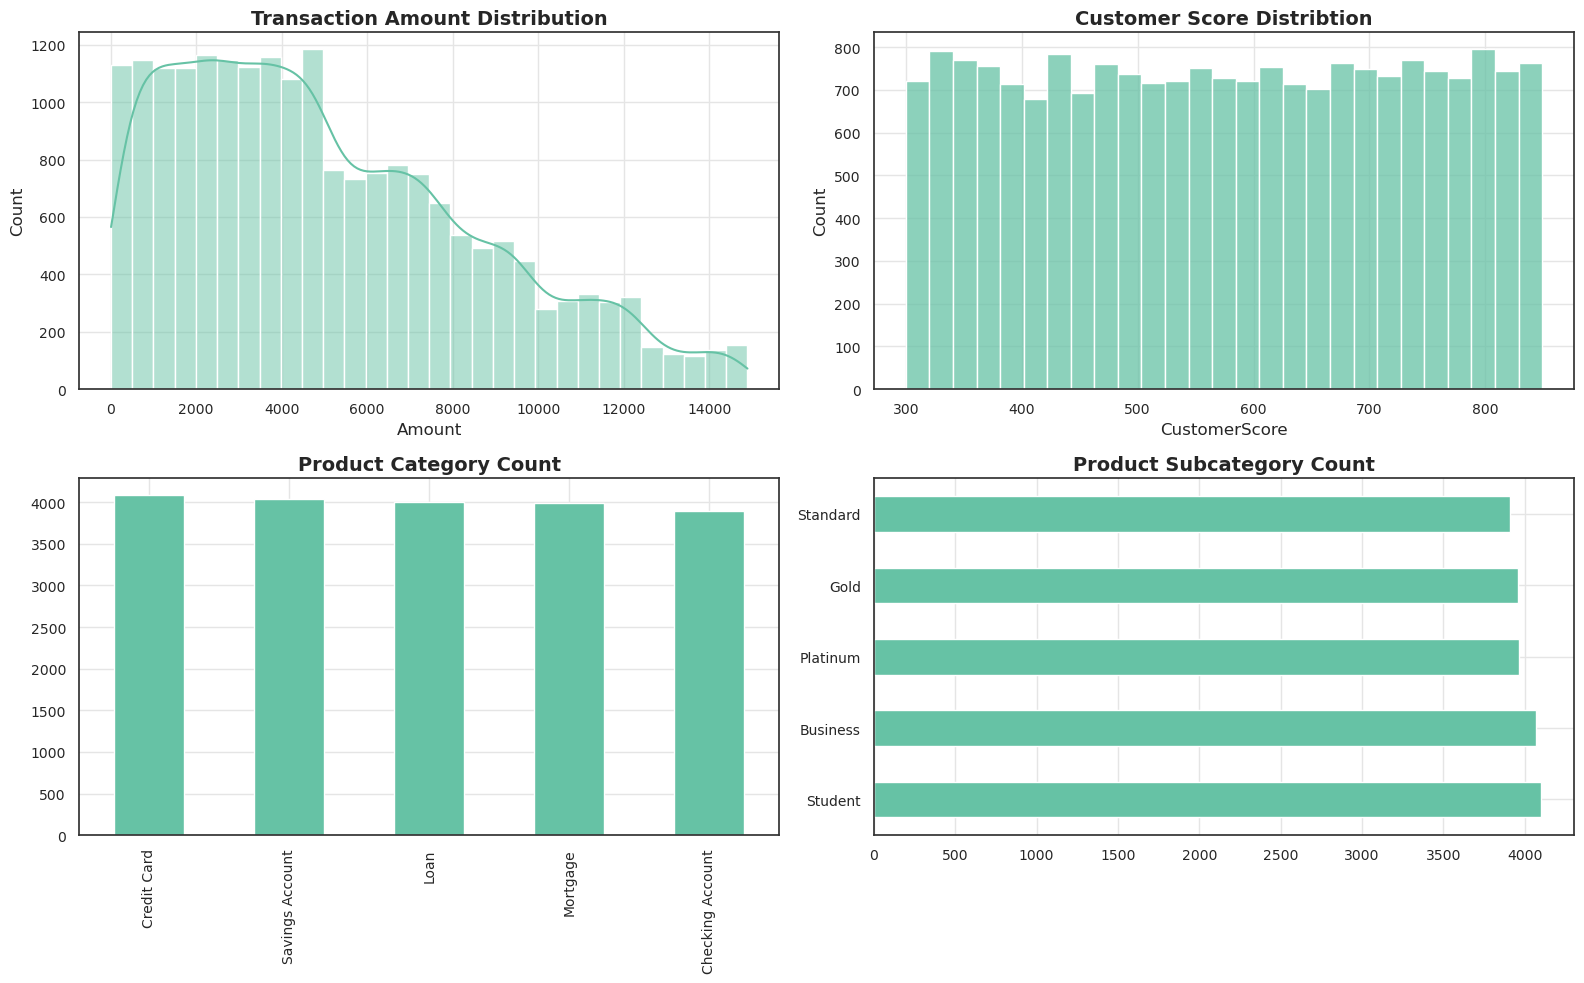

In [14]:
plt.figure(figsize=(16, 10))

# Transaction Amount
plt.subplot(2,2,1)
sns.histplot(df['Amount'], bins=30, kde="True")
plt.title("Transaction Amount Distribution")

# Customer Score
plt.subplot(2,2,2)
sns.histplot(df['CustomerScore'])
plt.title("Customer Score Distribtion")

# Product Category
plt.subplot(2,2,3)
df["ProductCategory"].value_counts().plot(kind="bar")
plt.title("Product Category Count")

# Product Subcategory
plt.subplot(2,2,4)
df["ProductSubcategory"].value_counts().plot(kind="barh")
plt.title("Product Subcategory Count")

plt.tight_layout()
plt.show()

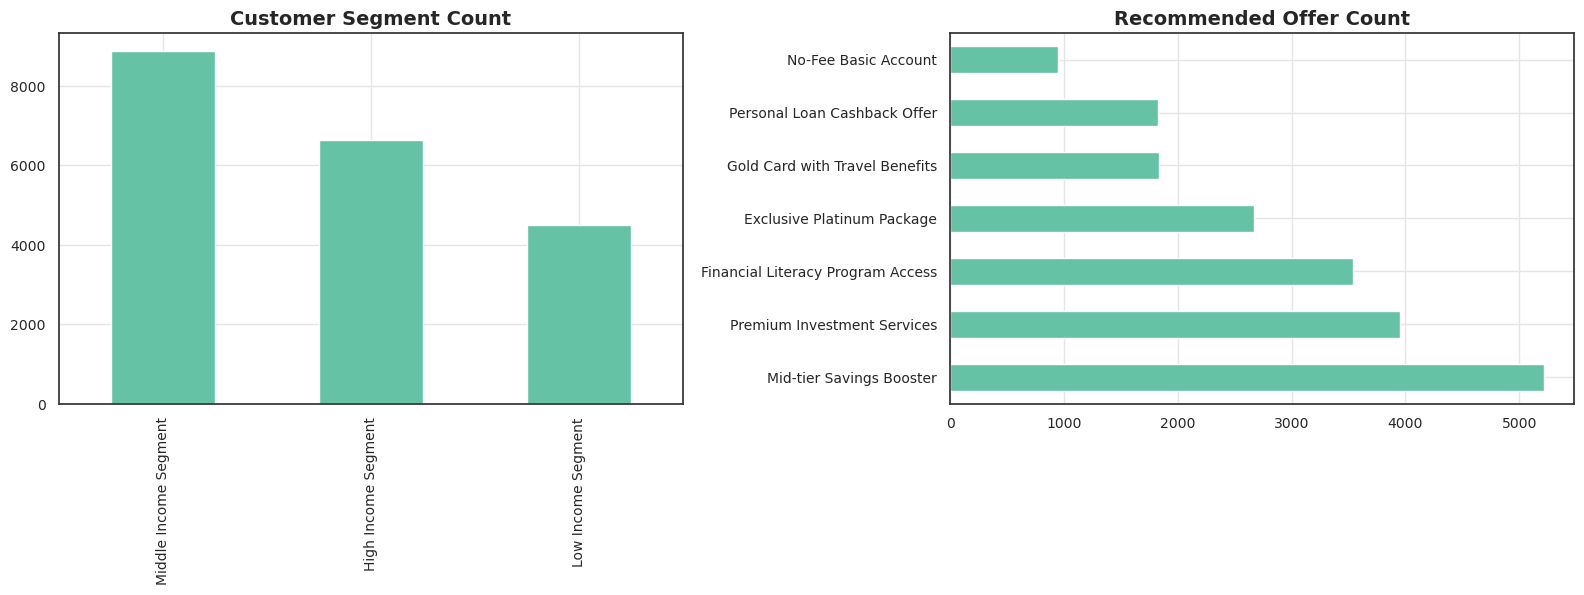

In [15]:
plt.figure(figsize=(16, 10))

# Customer Segment
plt.subplot(2,2,1)
df["CustomerSegment"].value_counts().plot(kind="bar")
plt.title("Customer Segment Count")

# Recommended Offer
plt.subplot(2,2,2)
df["RecommendedOffer"].value_counts().plot(kind="barh")
plt.title("Recommended Offer Count")

plt.tight_layout()
plt.show()

- Product Category and Subcategory seem to be evenly distributed
- Customer Score is also fairly evenly distributed accross low to high values
- Transaction amount show that most of amount fall below 5000
- the most recommended offer is Mid-tier Savings
- Customer Segment shows that most of the customers falls under middle income class and High income class then lower class, there's no significant difference between the three

<function matplotlib.pyplot.show(close=None, block=None)>

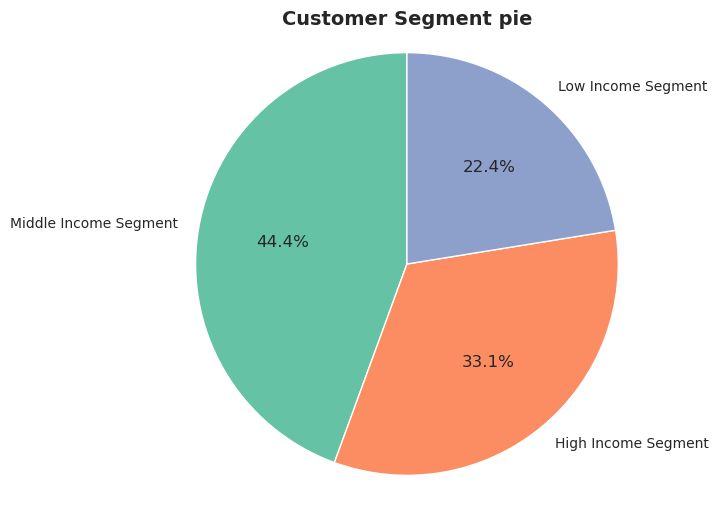

In [31]:
counts = df['CustomerSegment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Customer Segment pie")
plt.axis('equal')
plt.savefig("customersegment.png", dpi=300, bbox_inches='tight')
plt.show

the chart above shows 
- 44% of customers are Middle Income earners 

## Segmentation Analysis

### Checking the distribution of transaction across various categories
- Transaction x Product Category
- Transaction x Product Subcategory
- Transaction x Customer Segment

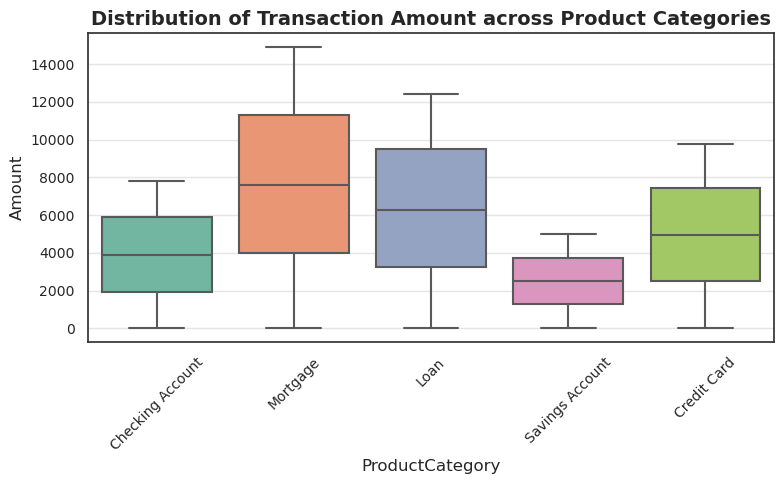

In [17]:
# product category

sns.boxplot(x="ProductCategory", y="Amount", data=df)
plt.title("Distribution of Transaction Amount across Product Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

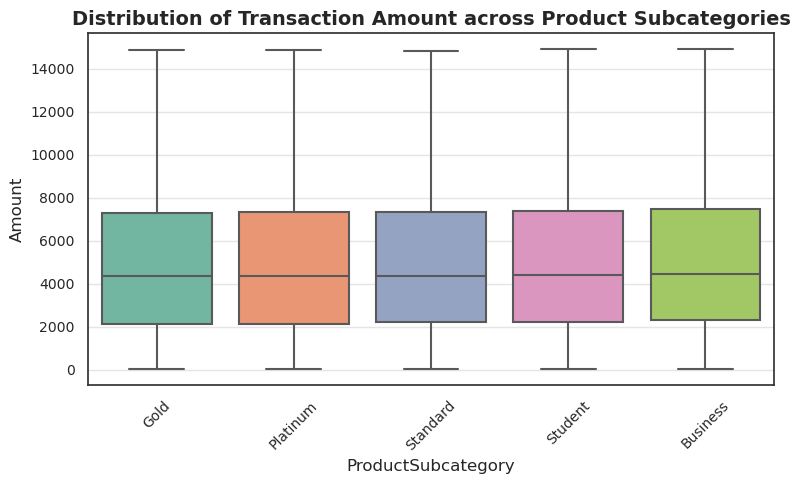

In [18]:
# product subcategory

sns.boxplot(x="ProductSubcategory", y="Amount", data=df)
plt.title("Distribution of Transaction Amount across Product Subcategories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

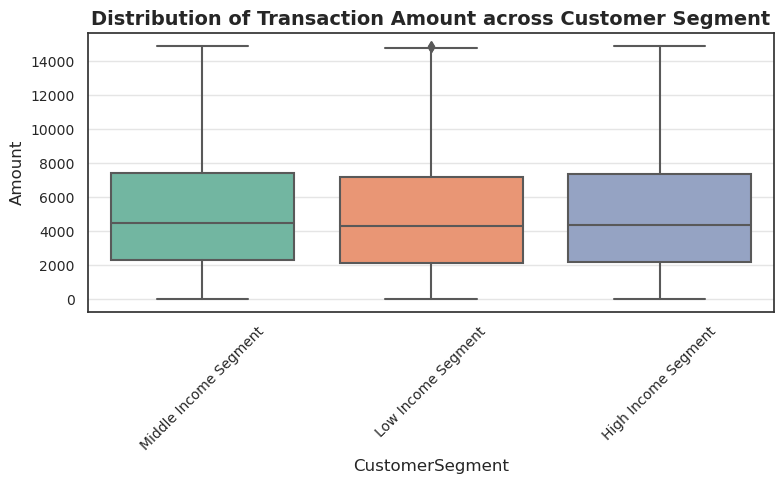

In [19]:
# customer segment
sns.boxplot(x="CustomerSegment", y="Amount", data=df)
plt.title("Distribution of Transaction Amount across Customer Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df.groupby('ProductCategory')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
ProductCategory,,,,,,,,
Checking Account,3888.0,3896.878949,2281.355637,10.301032,1901.717908,3889.922377,5923.764084,7794.185101
Credit Card,4082.0,4948.902614,2822.379492,11.825579,2509.453447,4943.043212,7415.337539,9776.408822
Loan,3998.0,6316.101948,3592.678761,12.999978,3234.306323,6278.362255,9483.732142,12415.102975
Mortgage,3990.0,7594.518974,4257.295430,18.907984,3998.867352,7595.839460,11319.807218,14895.170734
Savings Account,4042.0,2498.938702,1429.516756,8.275197,1280.654078,2486.095644,3712.120453,4987.110585


Transaction across product category shows transactions on mortgages and loans were higher than others on average, ranked below
1. Mortgages- {avg: 7.5k, max: 14k}
2. Loans- {avg: 6k, max: 12k}
3. Credit Card- {avg: 4k, max: 9k}
4. Checking account: {avg: 3.8k, max: 7.7k}
5. Savings account- {avg: 2k, max: 4.9k}

Transactions across Product subcategory and Customer Segment are eqully distributed

Their average range falling between
2k and 7k for Product Subcategory and
2k and 8k across all income earners

In [21]:
df.groupby('CustomerSegment')['ProductCategory'].value_counts()

CustomerSegment        ProductCategory 
High Income Segment    Savings Account     1356
                       Credit Card         1348
                       Mortgage            1324
                       Loan                1305
                       Checking Account    1293
Low Income Segment     Savings Account      949
                       Checking Account     907
                       Credit Card          897
                       Mortgage             871
                       Loan                 865
Middle Income Segment  Credit Card         1837
                       Loan                1828
                       Mortgage            1795
                       Savings Account     1737
                       Checking Account    1688
Name: ProductCategory, dtype: int64

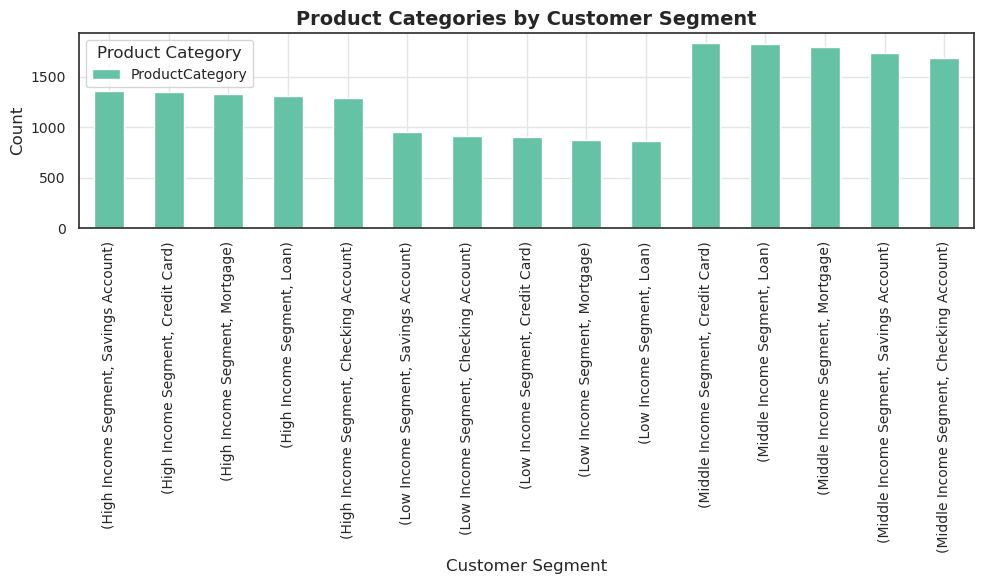

In [22]:
counts = df.groupby('CustomerSegment')['ProductCategory'].value_counts()
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Product Categories by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

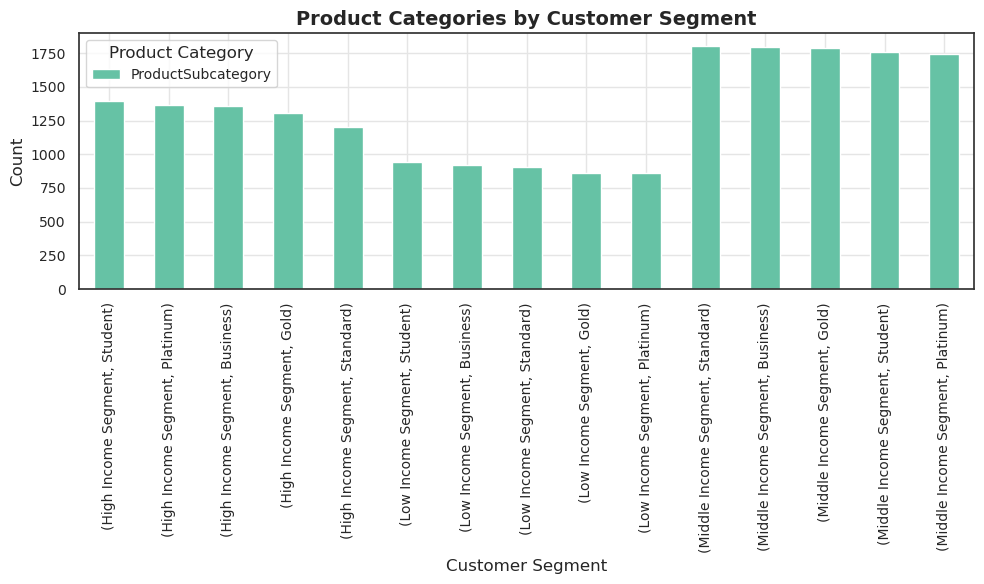

In [23]:
counts = df.groupby('CustomerSegment')['ProductSubcategory'].value_counts()
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Product Categories by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

The plot tells us that Middle class earners make a majority of the customers which is also clearly seen from the Customer Segment pie chart above and also there isn't much prefernce of a particular product category or subcategory over others.

In [24]:
df.groupby('RecommendedOffer')['CustomerSegment'].value_counts()

RecommendedOffer                   CustomerSegment      
Exclusive Platinum Package         High Income Segment      2672
Financial Literacy Program Access  Low Income Segment       3540
Gold Card with Travel Benefits     Middle Income Segment    1837
Mid-tier Savings Booster           Middle Income Segment    5220
No-Fee Basic Account               Low Income Segment        949
Personal Loan Cashback Offer       Middle Income Segment    1828
Premium Investment Services        High Income Segment      3954
Name: CustomerSegment, dtype: int64

Recommended Offers are products recommended based on Income class which clearly fits the present needs for each income class

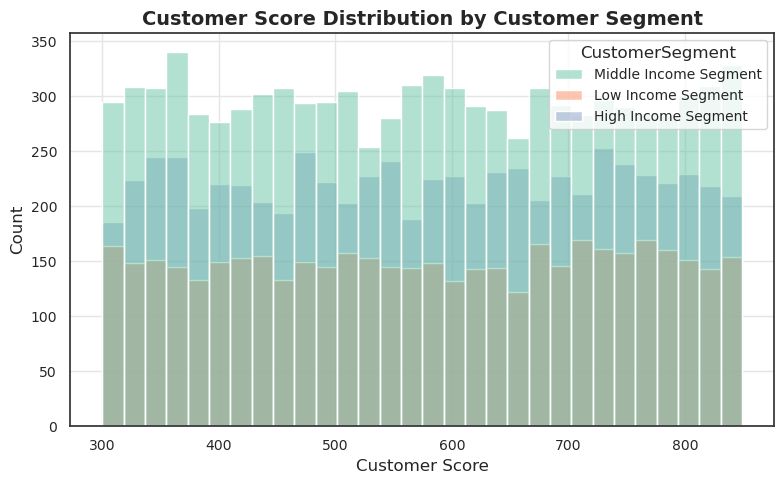

In [25]:
sns.histplot(
    data=df,
    x='CustomerScore',
    hue='CustomerSegment',
    bins=30,
    stat='count',
    common_norm='False',
    )

plt.title('Customer Score Distribution by Customer Segment')
plt.xlabel('Customer Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [26]:
df.groupby('CustomerSegment')['CustomerScore'].describe()

,count,mean,std,min,25%,50%,75%,max
CustomerSegment,,,,,,,,
High Income Segment,6626.0,576.191669,158.346954,300.0,439.0,578.0,715.0,849.0
Low Income Segment,4489.0,576.762976,160.050671,300.0,438.0,577.0,718.0,849.0
Middle Income Segment,8885.0,573.890152,159.899903,300.0,435.0,574.0,713.0,849.0


The average credit score across all income class is the same, so no class has a higher or lower credit score that usual

In [27]:
spending = df.groupby(['CustomerSegment', 'ProductCategory'])['Amount'].sum().unstack(fill_value=0)


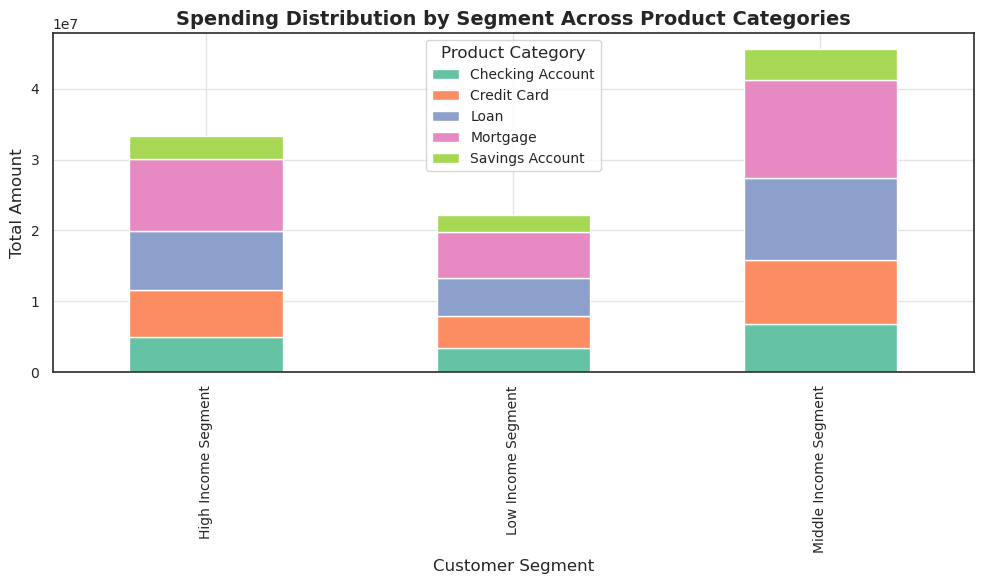

In [28]:
spending.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spending Distribution by Segment Across Product Categories')
plt.xlabel('Customer Segment')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


In [29]:
df.groupby(['CustomerSegment', 'ProductCategory'])['Amount'].describe()


count         mean          std  \
CustomerSegment       ProductCategory                                      
High Income Segment   Checking Account  1293.0  3852.494081  2295.064557   
                      Credit Card       1348.0  4898.537291  2827.972697   
                      Loan              1305.0  6380.821268  3575.109847   
                      Mortgage          1324.0  7634.931453  4262.257347   
                      Savings Account   1356.0  2448.547537  1415.850064   
Low Income Segment    Checking Account   907.0  3779.275354  2266.314833   
                      Credit Card        897.0  4986.589295  2839.121659   
                      Loan               865.0  6244.075195  3661.799769   
                      Mortgage           871.0  7370.557491  4237.400380   
                      Savings Account    949.0  2557.510004  1461.430695   
Middle Income Segment Checking Account  1688.0  3994.068578  2276.190416   
                      Credit Card       1837.0  4967.458684  2811.077928   
                      Loan              1828.0  6303.981832  3573.321108   
                      Mortgage          1795.0  7673.384895  4261.897697   
                      Savings Account   1737.0  2506.276788  1421.945705   

                                              min          25%          50%  \
CustomerSegment       ProductCategory                                         
High Income Segment   Checking Account  10.301032  1831.244344  3837.465872   
                      Credit Card       13.644899  2492.030525  4781.162867   
                      Loan              44.177575  3316.173901  6321.887969   
                      Mortgage          19.801979  3995.280199  7672.894339   
                      Savings Account    8.275197  1210.955870  2406.396368   
Low Income Segment    Checking Account  14.394932  1750.364477  3768.680555   
                      Credit Card       19.591923  2544.573168  4956.394672   
                      Loan              14.018123  3007.452365  6401.340555   
                      Mortgage          18.907984  3716.432128  7141.526338   
                      Savings Account   12.549967  1351.590573  2562.183561   
Middle Income Segment Checking Account  11.915198  2025.536938  3982.861705   
                      Credit Card       11.825579  2504.704631  5012.803370   
                      Loan              12.999978  3291.623561  6179.111708   
                      Mortgage          31.543107  4174.410628  7818.905997   
                      Savings Account    9.686819  1283.498521  2533.776541   

                                                 75%           max  
CustomerSegment       ProductCategory                               
High Income Segment   Checking Account   5840.490259   7786.394995  
                      Credit Card        7330.788071   9769.532575  
                      Loan               9550.998026  12401.966417  
                      Mortgage          11404.975097  14892.056653  
                      Savings Account    3669.946377   4986.841230  
Low Income Segment    Checking Account   5841.441604   7771.571178  
                      Credit Card        7468.670021   9776.408822  
                      Loan               9459.004868  12415.102975  
                      Mortgage          11096.707157  14878.169937  
                      Savings Account    3808.111990   4979.678371  
Middle Income Segment Checking Account   6029.441288   7794.185101  
                      Credit Card        7431.168557   9776.330572  
                      Loan               9464.269425  12414.693233  
                      Mortgage          11340.894314  14895.170734  
                      Savings Account    3715.663225   4987.110585

In [30]:
pivot_mean = df.pivot_table(
    index='CustomerSegment',
    columns='ProductCategory',
    values='Amount',
    aggfunc='mean',
    fill_value=0
)
pivot_mean

ProductCategory,Checking Account,Credit Card,Loan,Mortgage,Savings Account
CustomerSegment,,,,,
High Income Segment,3852.494081,4898.537291,6380.821268,7634.931453,2448.547537
Low Income Segment,3779.275354,4986.589295,6244.075195,7370.557491,2557.510004
Middle Income Segment,3994.068578,4967.458684,6303.981832,7673.384895,2506.276788


There is no significant difference in spending on various products across income segments